Imports
---

In [39]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

From the cleaned data
---

See [Cleaning the Data](Cleaning the Data.ipynb) for cleaning details

- Read the data and print the shape

In [40]:
housing = pd.read_csv("housing-cleaned.csv")

In [41]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Data columns (total 10 columns):
longitude             17994 non-null float64
latitude              17994 non-null float64
housing_median_age    17994 non-null float64
total_rooms           17994 non-null float64
total_bedrooms        17808 non-null float64
population            17994 non-null float64
households            17994 non-null float64
median_income         17994 non-null float64
median_house_value    17994 non-null float64
ocean_proximity       17994 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [43]:
# Get counts for non-numeric items
# -> groupby with count
#housing.groupby(["ocean_proximity"]).count()
# -> value_counts
housing["ocean_proximity"].value_counts()

<1H OCEAN     7932
INLAND        6011
NEAR OCEAN    2183
NEAR BAY      1866
ISLAND           2
Name: ocean_proximity, dtype: int64

Basic Statistics
---

In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17994.000000,17994.000000,17994.000000,17994.000000,17808.000000,17994.000000,17994.000000,17994.000000,17994.00000
mean,-119.556300,35.649620,28.269034,2711.756808,550.131345,1473.998277,511.881794,3.752121,193343.64766
std,2.004385,2.148046,12.406289,2203.617044,421.837170,1129.768997,381.824243,1.561223,97924.08266
min,-124.350000,32.550000,1.000000,16.000000,4.000000,8.000000,3.000000,0.499900,14999.00000
25%,-121.750000,33.930000,18.000000,1507.000000,308.000000,828.000000,291.000000,2.592775,116825.00000
50%,-118.510000,34.270000,28.000000,2183.500000,444.000000,1207.000000,419.000000,3.537500,174850.00000
75%,-117.990000,37.720000,37.000000,3201.000000,654.000000,1769.000000,612.000000,4.666700,251175.00000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,499100.00000


Plot Everything
---

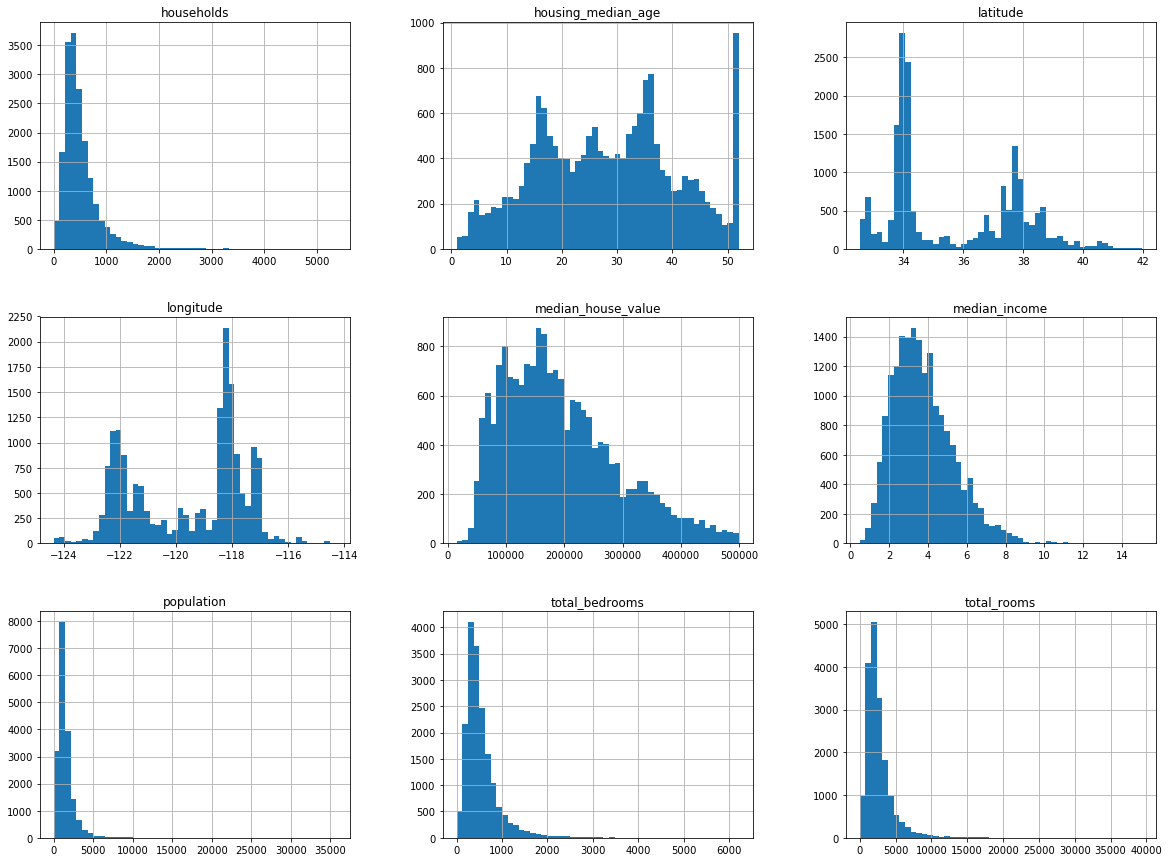

In [45]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

Splitting the Data Set
---

In [46]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

Notes
---

Purely random sampling may be a terrible idea. In this case both the `test_set` and `train_set` have decent `median_income` distributions

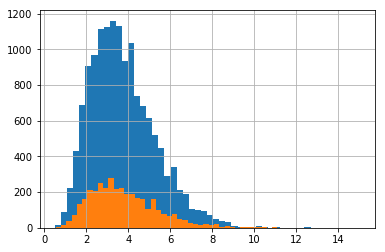

In [47]:
train_set["median_income"].hist(bins = 50)
test_set["median_income"].hist(bins = 50)

Stratified Sampling
---

Split the data into _strata_ which are representative of the entire group. For this case, `median_income` is a great strata. We want to reduce the number of strata to ~5, therefore we will divide the `median_income` by 1.5 and round to the nearest whole number. Anything above 5, will simply become 5.

In [48]:
housing["income_category"] = np.ceil(housing["median_income"] / 1.5)
housing["income_category"].where(housing["income_category"] < 5, 5.0, inplace=True)

In [49]:
# View the strata counts
housing["income_category"].value_counts()

3.0    6620
2.0    5721
4.0    3391
5.0    1645
1.0     617
Name: income_category, dtype: int64

Stratified Shuffle Split
---

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

In [51]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Resulting Distributions
---

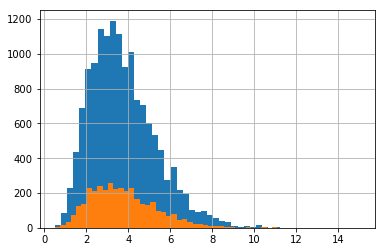

In [52]:
strat_train_set["median_income"].hist(bins = 50)
strat_test_set["median_income"].hist(bins = 50)

Remove the Stratified Category
---

It isn't necessary for our ML training steps

In [53]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_category"], axis = 1, inplace = True)

Write the Data to Disk
---

In [54]:
# For now, write the sets to disk
strat_train_set.to_csv("strat_train_set.csv", index=False)
strat_test_set.to_csv("strat_test_set.csv", index=False)